# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 1.) Fit a kmeans Model with any Number of Clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

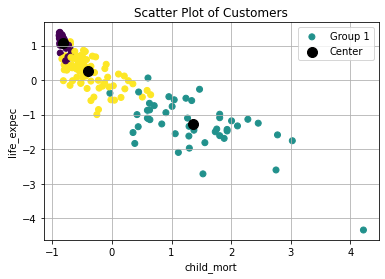

In [ ]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [ ]:
WCSSs = []
Ks = range(1,12)

for k in Ks:
  kmeans = KMeans(n_clusters=k, n_init=30, init = 'random')
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

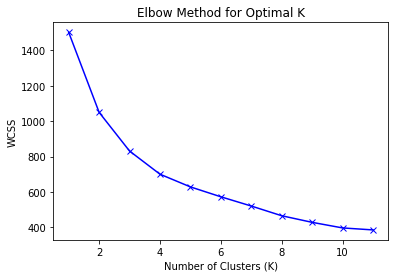

In [ ]:
plt.plot(Ks, WCSSs, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

I would choose the number of clusters to be 7 beacuse at this pivot point, the model complexity does not help accuracy as much. It is the elbow point where the drop in WCSS drops by not as much.

In [ ]:
# fit the model
kmeans = KMeans(n_clusters=7, n_init=30, init = 'random').fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [ ]:
preds = pd.DataFrame(kmeans.predict(X_scaled),columns = ["cluster"])
total = pd.concat([preds, X_scaled_df, names],axis =1)
total

,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,3,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,Afghanistan
1,4,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,Albania
2,0,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,Algeria
3,3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,Angola
4,2,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,2,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,Vanuatu
163,0,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,Venezuela
164,2,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,Vietnam
165,0,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,Yemen


In [ ]:
cluster_groups = total.groupby('cluster')
cluster_country_lists = []

for cluster, group in cluster_groups:
    country_list = group['country'].tolist()
    cluster_country_lists.append(country_list)

for i, country_list in enumerate(cluster_country_lists):
    print(f'Cluster {i}: {", ".join(country_list)}')

Cluster 0: Algeria, Argentina, Armenia, Azerbaijan, Bangladesh, Bolivia, China, Dominican Republic, Egypt, Gabon, Guatemala, India, Indonesia, Iran, Iraq, Jamaica, Kazakhstan, Libya, Mongolia, Morocco, Myanmar, Nepal, Oman, Peru, Philippines, Russia, Saudi Arabia, Sri Lanka, Tajikistan, Tonga, Uzbekistan, Venezuela, Yemen
Cluster 1: Luxembourg, Malta, Singapore
Cluster 2: Antigua and Barbuda, Bahrain, Belarus, Belize, Bhutan, Cambodia, Cape Verde, Estonia, Fiji, Guyana, Hungary, Jordan, Kyrgyz Republic, Lithuania, Malaysia, Maldives, Mauritius, Panama, Paraguay, Samoa, Seychelles, Slovak Republic, Solomon Islands, St. Vincent and the Grenadines, Thailand, Tunisia, Turkmenistan, Vanuatu, Vietnam
Cluster 3: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Ma

I notice that there are less countries assigned to cluster 1 and 5 compared to other clusters.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [ ]:
total_nonscaled = pd.concat([preds, X],axis =1)
cluster_groups = total_nonscaled.groupby('cluster')
cluster_means = cluster_groups.mean()
print(cluster_means)

         child_mort     exports    health     imports        income  \
cluster                                                               
0         31.187879   31.151182  4.831515   31.814118  12287.272727   
1          4.133333  176.000000  6.793333  156.666667  64033.333333   
2         20.744828   59.082759  5.816897   66.513793  12578.275862   
3         94.937209   28.318837  6.467442   43.823256   3431.697674   
4         12.565625   35.740625  8.410000   45.787500  15800.000000   
5        130.000000   25.300000  5.070000   17.400000   5150.000000   
6          5.134615   46.503846  9.131538   39.034615  47788.461538   

          inflation  life_expec  total_fer          gdpp  
cluster                                                   
0         14.037152   71.372727   2.736061   5420.787879  
1          2.468000   81.433333   1.380000  57566.666667  
2          4.266207   72.172414   2.430690   6630.551724  
3          9.398256   58.690698   5.028605   1708.418605  
4     

Interpretations of the descriptive statistics are as follows.

# Q7.) Write an observation about the descriptive statistics.

According to the descriptive statistics, we can see that different clusters have significantly different mean values for various features.For example, cluster 3 has a very high mean value for child mortality, a low income, low life expectancy, and low GDP, which indicates that the countries in this cluster are most likely developing countries. On the other hand, cluster 1 has a very low mean value for child mortality, a high income, high life expectancy, and high GDP, which suggests that the countries in this cluster are developed countries with a strong economy and a high standard of living.